#### 목차
- [PCA (Principal Component Analysis)](#PCA)
- [SVD (Singluar Value Decomposition)](#SVD)

# PCA

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner',
                          'exercise', 'body_shape'])
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 2, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [3]:
df

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,2,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [4]:
df.head()

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,2,Skinny
4,5000,2,2,2,0,Fat


In [5]:
X = df.iloc[:, :-1]
X

,calory,breakfast,lunch,dinner,exercise
0,1200,1,0,0,2
1,2800,1,1,1,1
2,3500,2,2,1,0
3,1400,0,1,0,2
4,5000,2,2,2,0
5,1300,0,0,1,2
6,3000,1,0,1,1
7,4000,2,2,2,0
8,2600,0,2,0,0
9,3000,1,2,1,1


In [6]:
y = df.iloc[:, -1]
y

0    Skinny
1    Normal
2       Fat
3    Skinny
4       Fat
5    Skinny
6    Normal
7       Fat
8    Normal
9       Fat
Name: body_shape, dtype: object

## 표준화

In [7]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.32424438],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.12038585],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.08347268],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  1.32424438],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.08347268],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.32424438],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.12038585],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.08347268],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.08347268],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.12038585]])

In [8]:
X_std.mean(), X_std.std()

(2.581268532253489e-17, 0.9999999999999999)

## 공분산행렬
- 표준편차 행렬의 내적을 데이터 사이즈로 나누면 공분산행렬이 됨.

In [9]:
features = X_std.T
covariance_matrix = np.cov(features)
covariance_matrix

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.96379192],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.6907443 ],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.88992651],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.59237483],
       [-0.96379192, -0.6907443 , -0.88992651, -0.59237483,  1.11111111]])

In [10]:
# 표준편차 행렬의 내적을 데이터 사이즈로 나누면 공분산행렬이 됨.
X_std.T.dot(X_std)/9

array([[ 1.11111111,  0.88379717,  0.76782385,  0.89376551, -0.96379192],
       [ 0.88379717,  1.11111111,  0.49362406,  0.81967902, -0.6907443 ],
       [ 0.76782385,  0.49362406,  1.11111111,  0.40056715, -0.88992651],
       [ 0.89376551,  0.81967902,  0.40056715,  1.11111111, -0.59237483],
       [-0.96379192, -0.6907443 , -0.88992651, -0.59237483,  1.11111111]])

## 고유값, 고유벡터
#### 크기 순으로 도출된 고유값, 각각이 가진 오리지널 행렬의 정보량은?
- 각각의 고유값을 고유값 총합으로 나누어주면 됨.

In [11]:
eig_vals, eig_vecs = np.linalg.eig(covariance_matrix)
print(eig_vals)
print(eig_vecs)

[4.0985798  0.91491564 0.05423354 0.19806844 0.28975813]
[[-0.50740195 -0.05008091 -0.81135633  0.25099131  0.13689208]
 [-0.43833216 -0.39214493  0.102096   -0.21237579 -0.77366673]
 [-0.39780266  0.64178269  0.02176389 -0.6502015   0.08143937]
 [-0.41788636 -0.54634525  0.33778695 -0.19564558  0.61196458]
 [ 0.46640349 -0.36515217 -0.46551436 -0.65639981  0.03958965]]


In [12]:
# 크기 순으로 도출된 고유값, 각각이 가진 오리지널 행렬의 정보량은?
# 각각의 고유값을 고유값 총합으로 나누어주면 됨.
eig_vals[0] / sum(eig_vals)

0.7377443642656086

In [13]:
eig_vals[1] / sum(eig_vals)

0.1646848153725042

In [14]:
# 첫번째, 두번째 고유값으로 전체 정보량의 9할을 설명
(eig_vals[0] + eig_vals[1]) / sum(eig_vals)

0.9024291796381128

## 첫번째 Principal Axis로 사영(projection)한 X
- 첫번째 고유벡터 방향으로 주축 변환

In [15]:
projected_X = X_std.dot(eig_vecs.T[0])
projected_X

array([ 2.38852468,  0.07902851, -1.80859104,  2.411258  , -3.05687238,
        2.3140085 ,  0.44849935, -2.62267182,  0.31093874, -0.46412255])

In [16]:
result = pd.DataFrame(projected_X, columns=['PC1'])
result['y-axis'] = 0.0  # 1차원이므로 y는 0으로 고정.
result['label'] = y
result

,PC1,y-axis,label
0,2.388525,0.0,Skinny
1,0.079029,0.0,Normal
2,-1.808591,0.0,Fat
3,2.411258,0.0,Skinny
4,-3.056872,0.0,Fat
5,2.314009,0.0,Skinny
6,0.448499,0.0,Normal
7,-2.622672,0.0,Fat
8,0.310939,0.0,Normal
9,-0.464123,0.0,Fat


## 시각화

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'PCA result')

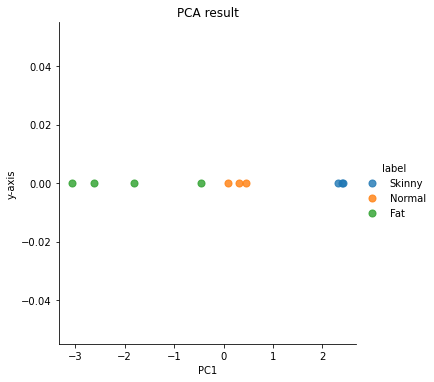

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot("PC1", 'y-axis', data=result,
          fit_reg=False, scatter_kws={'s':50},
          hue='label')
plt.title('PCA result')

## scikit-learn PCA

#### 1차원

In [18]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=1)
pca_x = pca.fit_transform(X_std)
pca_x

array([[-2.38852468],
       [-0.07902851],
       [ 1.80859104],
       [-2.411258  ],
       [ 3.05687238],
       [-2.3140085 ],
       [-0.44849935],
       [ 2.62267182],
       [-0.31093874],
       [ 0.46412255]])

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'PCA result')

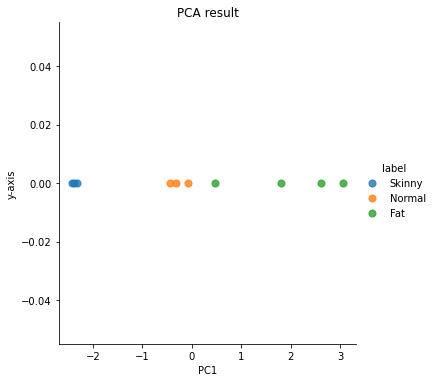

In [19]:
result2 = pd.DataFrame(pca_x, columns=['PC1'])
result2['y-axis'] = 0.0  # 1차원이므로 y는 0으로 고정.
result2['label'] = y

sns.lmplot("PC1", 'y-axis', data=result2,
          fit_reg=False, scatter_kws={'s':50},
          hue='label')
plt.title('PCA result')

#### 2차원

In [20]:
pca = decomposition.PCA(n_components=2)
pca_x = pca.fit_transform(X_std)
pca_x

array([[-2.38852468, -0.5968048 ],
       [-0.07902851, -0.27010064],
       [ 1.80859104,  0.3694101 ],
       [-2.411258  ,  0.63705618],
       [ 3.05687238, -0.47536694],
       [-2.3140085 , -0.87532668],
       [-0.44849935, -1.01484705],
       [ 2.62267182, -0.43251106],
       [-0.31093874,  2.20098746],
       [ 0.46412255,  0.45750341]])

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'PCA result')

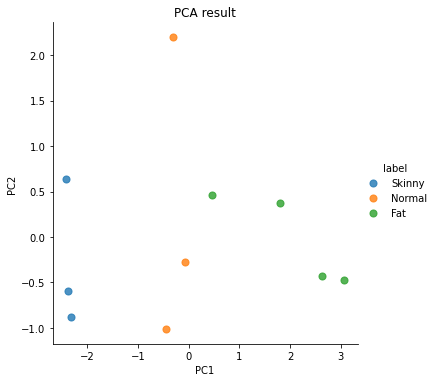

In [21]:
result3 = pd.DataFrame(pca_x, columns=['PC1', 'PC2'])
result3['label'] = y

sns.lmplot("PC1", "PC2", data=result3,
          fit_reg=False, scatter_kws={'s':50},
          hue='label')
plt.title('PCA result')

# SVD

In [27]:
import numpy as np

In [29]:
A = np.array([[1, 0, 0, 0, 2],
            [0, 0, 3, 0, 0],
            [0,0,0,0,0],
            [0,2,0,0,0]])

U, s, VT = np.linalg.svd(A)
print(f'U:{U}')
print(f's:{s}')
print(f"VT:{VT}")

U:[[ 0.  1.  0.  0.]
 [ 1.  0.  0.  0.]
 [ 0.  0.  0. -1.]
 [ 0.  0.  1.  0.]]
s:[3.         2.23606798 2.         0.        ]
VT:[[-0.          0.          1.         -0.          0.        ]
 [ 0.4472136   0.          0.          0.          0.89442719]
 [-0.          1.          0.         -0.          0.        ]
 [ 0.          0.          0.          1.          0.        ]
 [-0.89442719  0.          0.          0.          0.4472136 ]]


image resolution : (640, 480)


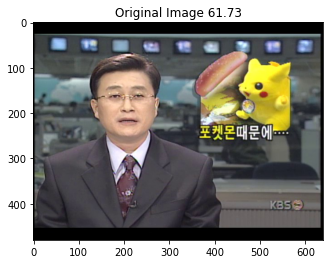

In [26]:
import os
from PIL import Image
import matplotlib.pyplot as plt

path = './image/220.jpg'
img = Image.open(path)
s = float(os.path.getsize(path))/1000
print('image resolution : {}'.format(img.size))
plt.title('Original Image {:.2f}'.format(s))
plt.imshow(img)

In [35]:
# 흑백으로 변환했지만 메타데이터는 그대로 남아있음
img_gray = img.convert('LA')

# 메타데이터를 제외한 순수한 이미지 정보만 가져옴
img_mat = np.array(list(img_gray.getdata(band=0)), float)
img_mat.shape

(307200,)

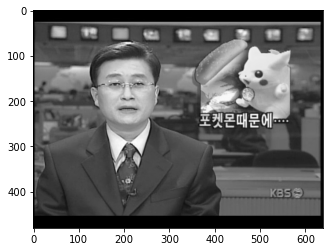

In [33]:
plt.imshow(img_gray)

In [36]:
img_mat.shape = (img_gray.size[1], img_gray.size[0])
img_mat = np.matrix(img_mat)
img_mat.shape

(480, 640)

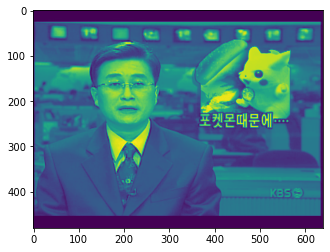

In [37]:
plt.imshow(img_mat)

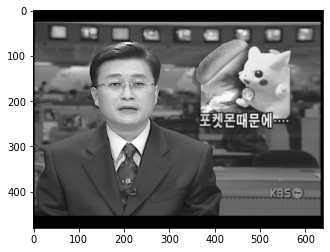

In [38]:
plt.figure()
plt.imshow(img_mat, cmap='gray')

In [42]:
U, sig, Vt = np.linalg.svd(img_mat)
sig.shape # 고윳값 총 400개

(480,)

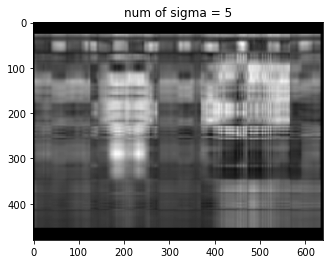

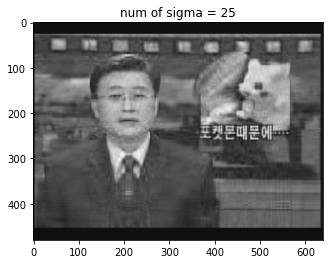

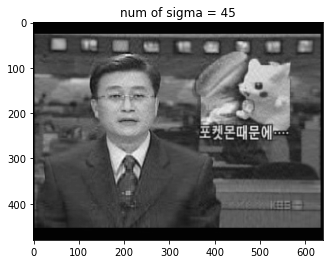

In [52]:
for i in range(5, 46, 20):
    # 특잇값 s의 갯수 = 5, 25, 45 = 적을수록 고압축
    # 특잇값 갯수에 따라, U와 Vt 쉐이프도 조정해준다
    plt.title(f"num of sigma = {i}")
    cmp_img = np.matrix(U[:, :i]) * np.diag(s[:i]) * np.matrix(Vt[:i, :])
    plt.imshow(cmp_img, cmap="gray")
    plt.show()